In [1]:
##################################################################################################################
# 
#   Seaborn Summary
#
#   Author: Philip Bramwell
#   Date: 14 December
# 
#   goal: 
#         * Give a brief summary of the available Seaborn plots
#
#   Documentation: https://seaborn.pydata.org/index.html
#
#   Index: 
#         1. Libary Imports
#         2. Load and clean Dataset
#         3. Seaborn plots with Matplotlib subplots example 
#         4. Seaborn jointplot example
#         5. Seaborn catplot example
#         6. Seaborn Pairgrid example
#         7. Seaborn heatmap example
#         8. Seaborn clustermap example
#
##################################################################################################################

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [3]:
# miles per gallon DataSet
# https://github.com/mwaskom/seaborn-data

df = sns.load_dataset('mpg')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
# check for nan values

df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# drop nan values

df = df.dropna()

## Seaborn plots with Matplotlib subplots 

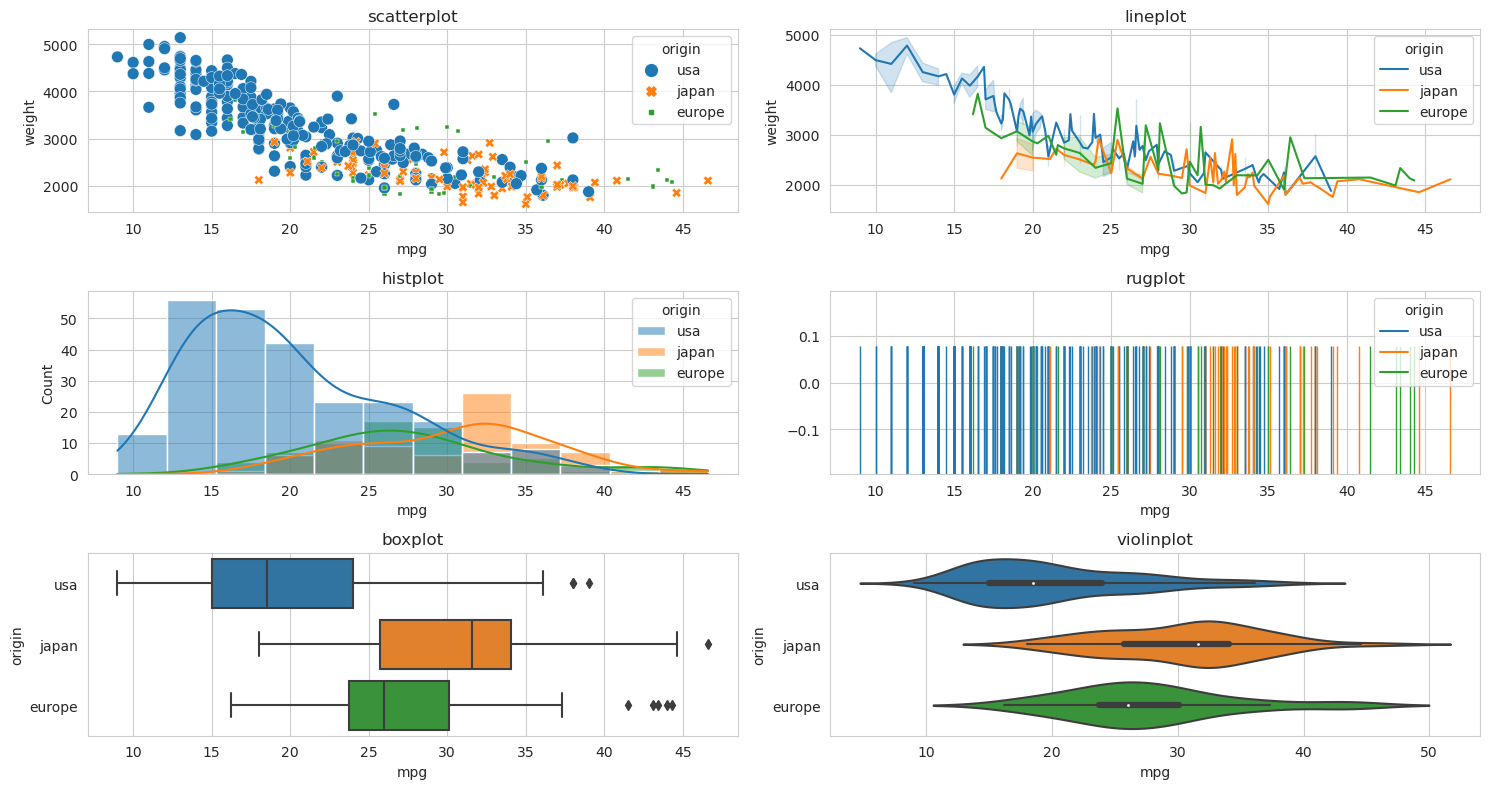

In [8]:
# https://seaborn.pydata.org/examples/index.html

# choose a whitegrid as background
sns.set_style(style='whitegrid')

# create matplotlib figure and 4 axes (3 rows and 2 columns)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), dpi=100)

# scatterplot on axes row=0 and column=0, hue parameter tells seaborn to colour the data points for 'origin' differently
axes[0, 0].set_title('scatterplot')
sns.scatterplot(data=df, x='mpg', y='weight', ax=axes[0, 0], hue='origin', style='origin', size='origin')

# lineplot on axes row=0 and column=1
axes[0, 1].set_title('lineplot')
sns.lineplot(data=df, x='mpg', y='weight', ax=axes[0, 1], hue='origin')

# histplot on axes row=1 and column=1, kde (kernel density estimate) parameter visualizes the distribution
axes[1, 0].set_title('histplot')
sns.histplot(data=df, x='mpg', ax=axes[1, 0], hue='origin', kde=True)

# rugplot on axes row=1 and column=1
axes[1, 1].set_title('rugplot')
sns.rugplot(data=df, x='mpg', ax=axes[1, 1], height=0.7, hue='origin')

# boxplot on axes row=2 and column=0
axes[2, 0].set_title('boxplot')
sns.boxplot(data=df, x='mpg', y='origin', ax=axes[2, 0])

# violinplot on axes row=2 and column=1
axes[2, 1].set_title('violinplot')
sns.violinplot(data=df, x='mpg', y='origin', ax=axes[2, 1])

plt.tight_layout()

## Seaborn jointplot

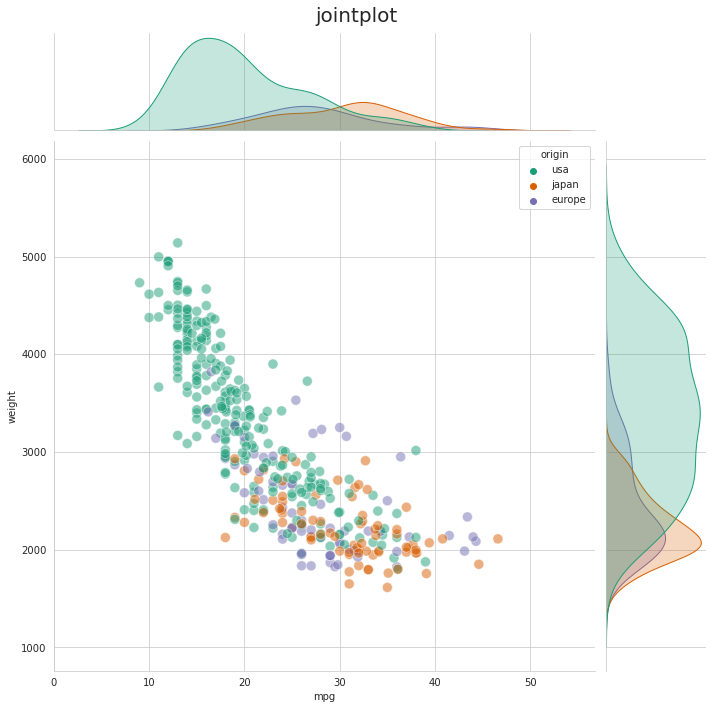

In [9]:
# jointplot joins two datavisualisations together
# the 'kind' parameter defines the kind of plot to draw (scatter, kde, hist, ...)

plot = sns.jointplot(data=df, x='mpg', y='weight', hue='origin', height=10, palette='Dark2', kind='scatter', joint_kws={'s': 100, 'alpha': 0.5})
plot.fig.suptitle('jointplot', fontsize=20)
plot.fig.tight_layout()

## Seaborn catplot

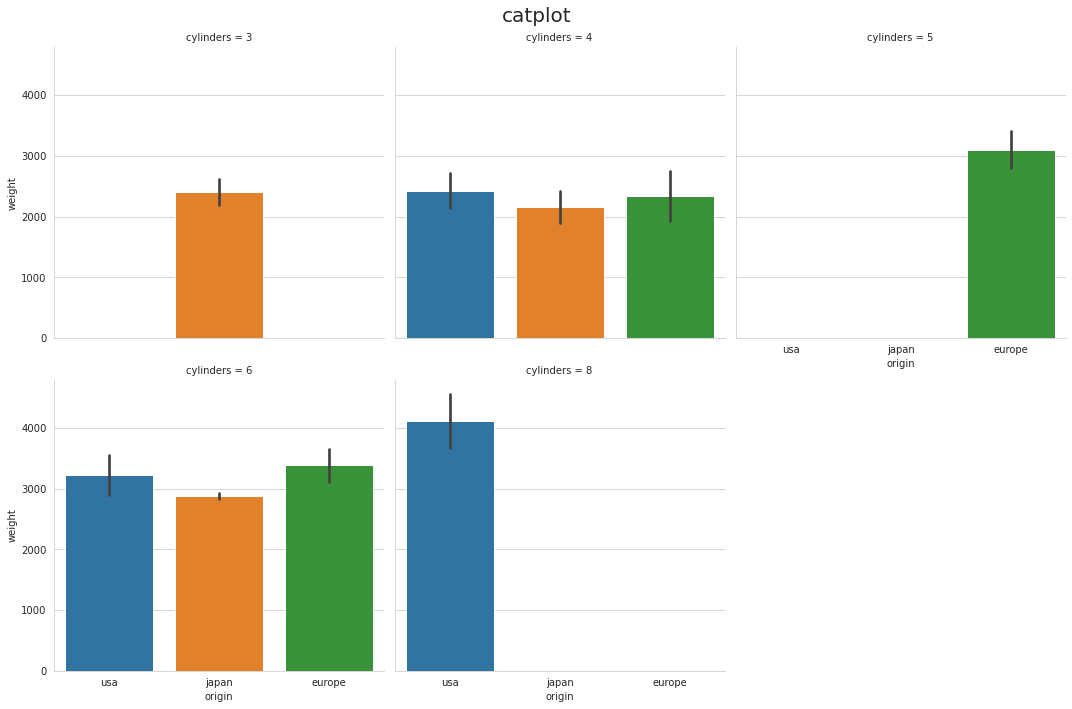

In [10]:
# catplot subdivided by the dataframe column 'cylinders' 
# the 'kind' parameter defines the kind of plot to draw (box, violin, bar, count, ...)
# barplot as catplot with the the dataframe-column 'cylinders' as col-parameter to split the plot in different axes for the 'cylinders' values
# ci (confidence interval) parameter can take float values or 'sd' for standard deviation
# estimator parameter defines which estimate within each categorical bin will be used

plot = sns.catplot(data=df, x='origin', y='weight', kind='bar', col='cylinders', col_wrap=3, ci='sd', estimator=np.mean)
plot.fig.suptitle('catplot', fontsize=20)
plot.fig.tight_layout()

## Seaborn Pairgrid

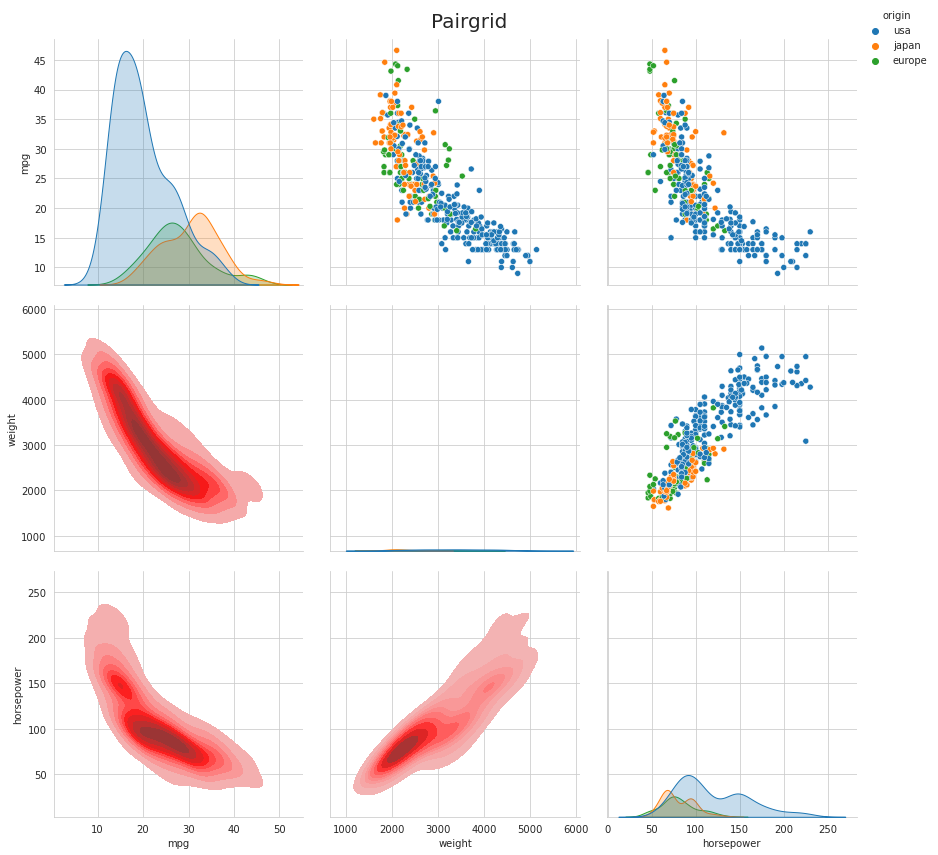

In [11]:
# create new DataFrame containing only the columns mpg, weight, horsepower and origin
df_copy = df[['mpg', 'weight', 'horsepower', 'origin']].copy()

# create PairGrid with a copy of the orignal DataFrame as parameter
pair_grid = sns.PairGrid(df_copy, hue='origin', height=4)
pair_grid.fig.suptitle('Pairgrid', fontsize=20)
pair_grid.fig.tight_layout()

# show a scatterplot for the upper section of the PairGrid
pair_grid.map_upper(sns.scatterplot)

# show a kdeplot for the diagonal section of the PairGrid
pair_grid.map_diag(sns.kdeplot, shade=True)

# show a kdeplot for the lower section of the PairGrid
pair_grid.map_lower(sns.kdeplot, hue=None, color='red', shade=True)

pair_grid.add_legend(bbox_to_anchor=(1, 0.95), title='origin')

## Seaborn heatmap

<AxesSubplot:>

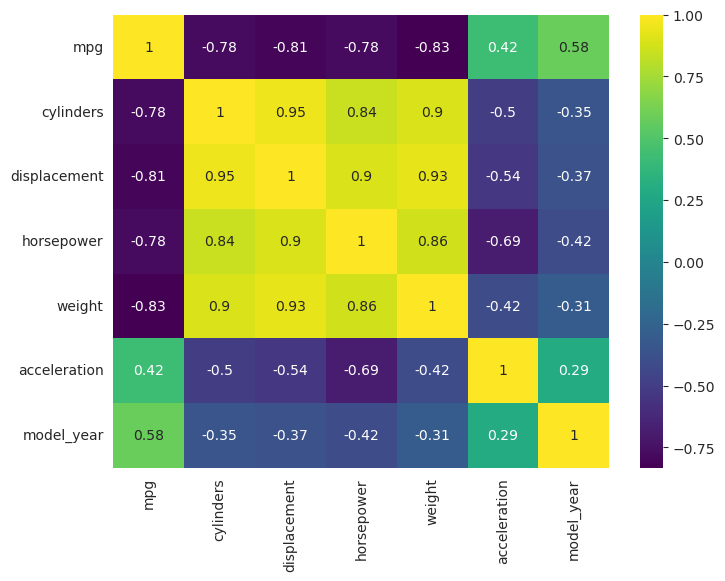

In [12]:
# set the figuresize and the dpi value for the heatmap
plt.figure(figsize=(8, 6), dpi=100)

# get the correlation of the dataframe-columns
correlation = df.corr()

# create a heatmap with the correlation values of the DataFrame
sns.heatmap(correlation, cmap='viridis', annot=True)

## Seaborn clustermap

<Figure size 800x600 with 0 Axes>

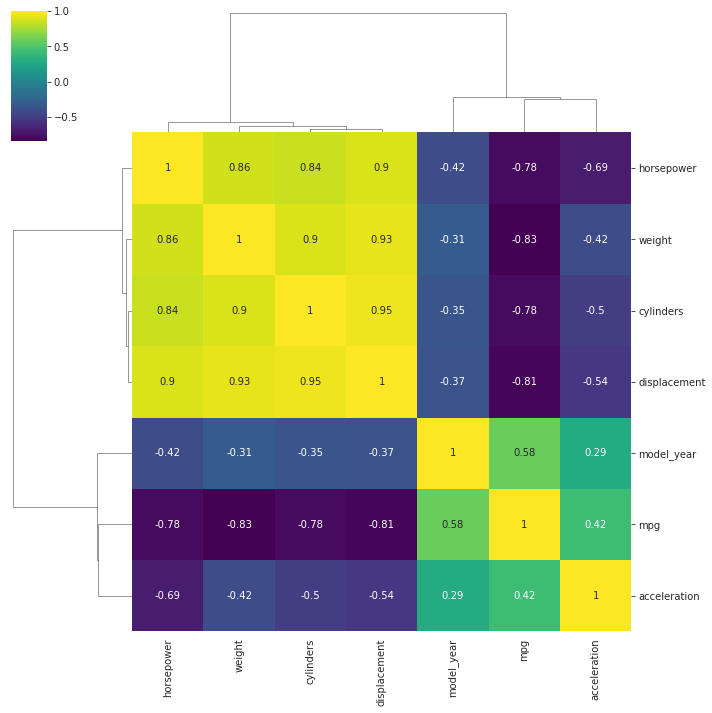

In [13]:
# set the figuresize and the dpi value for the heatmap
plt.figure(figsize=(8, 6), dpi=100)

# create a clustermap with the correlation values of the DataFrame
sns.clustermap(data=correlation, cmap='viridis', annot=True)